In [1]:
import numpy as np
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
uploaded = files.upload()

In [ ]:
!ls

datasetspotify.csv  sample_data


In [ ]:
data = pd.read_csv('datasetspotify.csv', on_bad_lines='skip')

<ipython-input-7-d82530b95d3d>:1: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('datasetspotify.csv', on_bad_lines='skip')


In [ ]:
data

,t,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0.0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1.0,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1.0,0.0557,0.2100,0.000000,0.117,0.12,76.332,4,acoustic;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1.0,0.0363,0.9050,0.000071,0.132,0.143,181.74,3,acoustic;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1.0,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111520,"113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,""#...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111521,"113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,""#...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111522,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0.0,0.0420,0.8670,0.000000,0.0839,0.743,132.378,4,world-music;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
111523,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1.0,0.0297,0.3810,0.000000,0.27,0.413,135.96,4,world-music;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;


In [ ]:
data.info() #выводим информацию по датасету

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111525 entries, 0 to 111524
Data columns (total 21 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   t                                                 111525 non-null  object 
 1   track_id                                          105939 non-null  object 
 2   artists                                           105938 non-null  object 
 3   album_name                                        105938 non-null  object 
 4   track_name                                        105938 non-null  object 
 5   popularity                                        105939 non-null  object 
 6   duration_ms                                       105939 non-null  object 
 7   explicit                                          105939 non-null  object 
 8   danceability                                      105939 non-null  float64
 9   ener

In [ ]:
data.columns #выводим названия стлбцов

Index(['t', 'track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature',
       'track_genre;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;'],
      dtype='object')

In [ ]:
data.describe() #выводим описание датасета

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness
count,105939.000000,105939.00000,105939.000000,105939.000000,105939.000000,105939.000000,105939.00000,105939.000000
mean,0.575069,0.64109,5.313813,-8.031169,0.634428,0.085087,0.30973,0.151766
std,0.253445,0.43752,3.579475,4.765611,0.481435,0.105436,1.04447,0.382818
min,-10.850000,-21.29700,-35.389000,-49.531000,0.000000,0.000000,0.00000,0.000000
25%,0.461000,0.48500,2.000000,-9.769000,0.000000,0.035800,0.01560,0.000000
50%,0.583000,0.69200,5.000000,-6.900000,1.000000,0.049100,0.15600,0.000039
75%,0.697000,0.85600,8.000000,-4.938000,1.000000,0.085600,0.56900,0.041600
max,11.000000,11.00000,11.000000,4.532000,1.000000,0.971000,161.33000,75.186000


In [ ]:
top_five_artists = data.groupby("artists").count().sort_values(by="popularity",
                                                            ascending=False)["popularity"][:5]
top_five_artists

,popularity
artists,
The Beatles,271
George Jones,267
Stevie Wonder,233
Linkin Park,222
Ella Fitzgerald,216


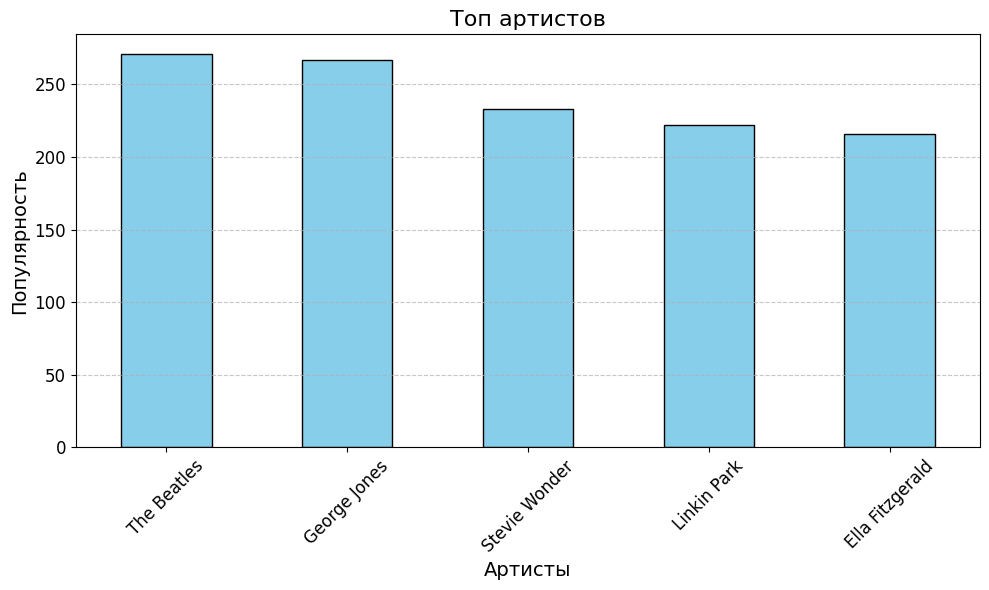

In [ ]:
plt.figure(figsize=(10, 6))
top_five_artists.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Топ артистов", fontsize=16)
plt.xlabel("Артисты", fontsize=14)
plt.ylabel("Популярность", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The Beatles лидируют в популярности

In [ ]:
most_danceable_song_artists = data[["danceability", "track_name", "artists"]].sort_values(by="danceability",
                                                                                       ascending=False)[:5]
most_danceable_song_artists

,danceability,track_name,artists
13716,11.0,232707,I Gotta Hold On U - Steve Silk Hurley Vocal Mix
13674,11.0,386935,As Always
13233,10.0,360483,I Wanna Let You Know (S&S Remixes) - Steve Sil...
13673,10.0,429798,I Wanna Let You Know (S&S Remixes) - Steve Sil...
91658,10.0,176213,Шурьяки


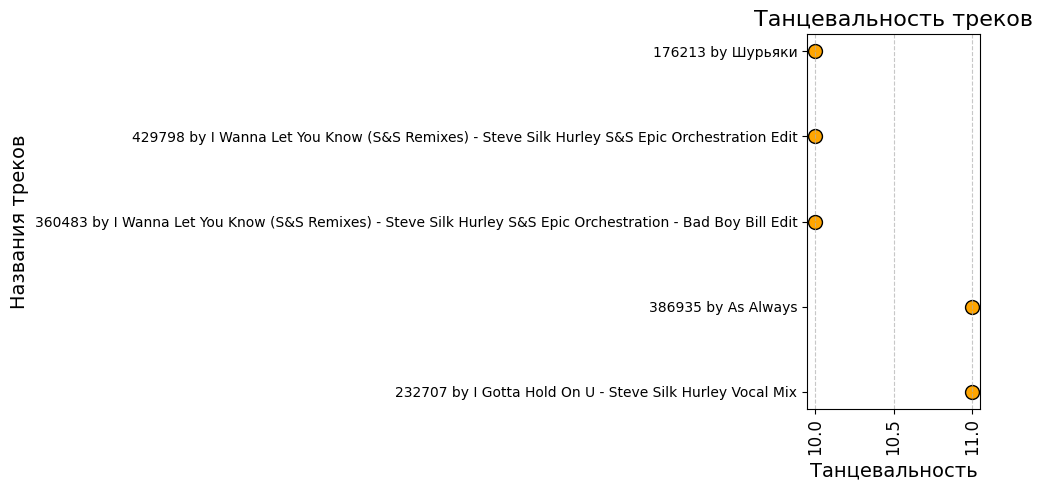

In [ ]:
most_danceable_song_artists['label'] = most_danceable_song_artists['track_name'] + ' by ' + most_danceable_song_artists['artists']

plt.figure(figsize=(10,5))
plt.scatter(most_danceable_song_artists['danceability'],
            most_danceable_song_artists['label'],
            color='orange', edgecolor='black', s=100)

plt.title('Танцевальность треков', fontsize=16)
plt.xlabel('Танцевальность', fontsize=14)
plt.ylabel('Названия треков', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

Построен график треков по степени танцевальности треков

In [ ]:
top_five_loudest_songs = data[["loudness", "track_name"]].sort_values(by="loudness", ascending=True)[:5]
top_five_loudest_songs

,loudness,track_name
99580,-49.531,Soothing White Noise - Loopable With No Fade
99271,-49.307,White Noise - Loopable With No Fade
99433,-46.591,Ceiling Fan Sound on Low Power
99105,-46.251,Cricket Sound 4 - Loopable With No Fade
77799,-43.957,Chaconne in sol maggiore : Variazione 9


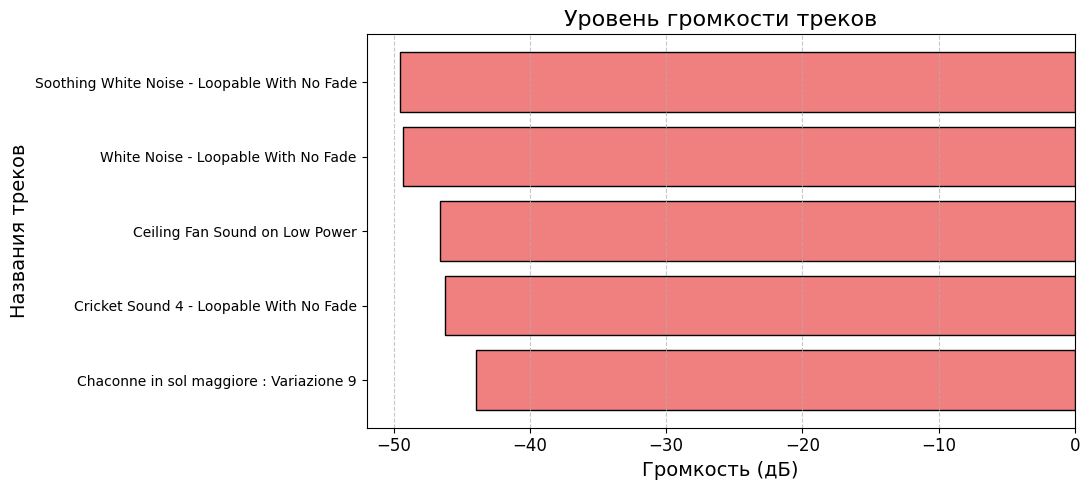

In [ ]:
plt.figure(figsize=(11,5))
plt.barh(
    top_five_loudest_songs["track_name"],
    top_five_loudest_songs["loudness"],
    color='lightcoral', edgecolor='black')

plt.title('Уровень громкости треков', fontsize=16)
plt.xlabel('Громкость (дБ)', fontsize=14)
plt.ylabel('Названия треков', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Был построен график треков по громкости

In [ ]:
top_ten_instrumental_tracks = data[["instrumentalness", "track_name"]].sort_values(by="instrumentalness",
                                                                                           ascending=False)[:5]
top_ten_instrumental_tracks

,instrumentalness,track_name
63779,75.186,False
105542,4.000,0.577
105440,4.000,0.528
24548,4.000,0.663
105432,4.000,0.639


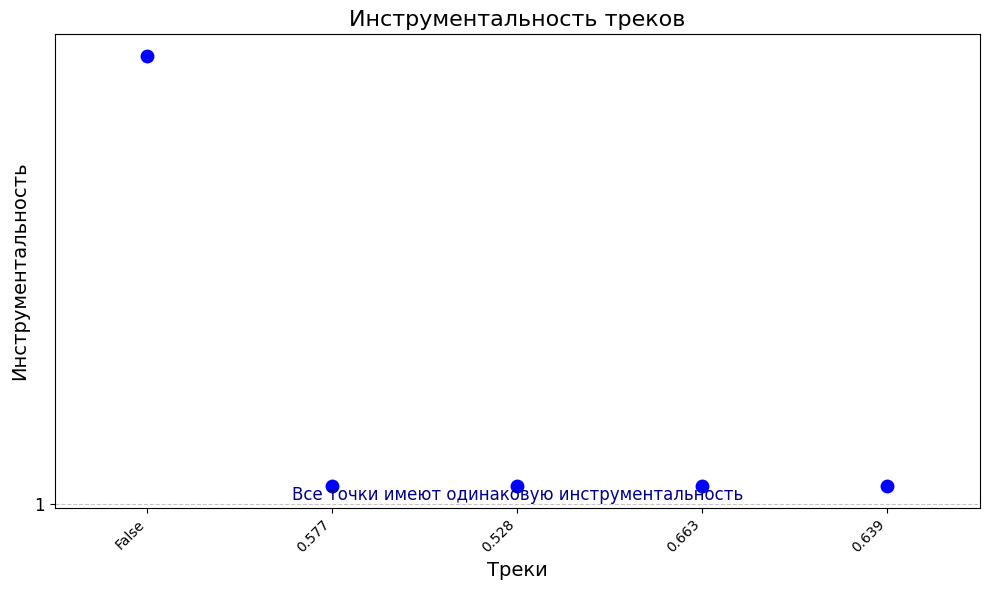

In [ ]:
plt.figure(figsize=(10,6))
sns.stripplot(x=top_ten_instrumental_tracks['track_name'],
              y=top_ten_instrumental_tracks['instrumentalness'],
              color='blue', size=10)

plt.title('Инструментальность треков', fontsize=16)
plt.xlabel('Треки', fontsize=14)
plt.ylabel('Инструментальность', fontsize=14)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks([1], labels=['1'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.text(2, 1, 'Все точки имеют одинаковую инструментальность', fontsize=12, color='darkblue',
         ha='center', va='bottom')
plt.tight_layout()
plt.show()

Был построен график инструментальности треков

Начинаем обучение модели с предварительной подготовки

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111525 entries, 0 to 111524
Data columns (total 21 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   t                                                 111525 non-null  object 
 1   track_id                                          105939 non-null  object 
 2   artists                                           105938 non-null  object 
 3   album_name                                        105938 non-null  object 
 4   track_name                                        105938 non-null  object 
 5   popularity                                        105939 non-null  object 
 6   duration_ms                                       105939 non-null  object 
 7   explicit                                          105939 non-null  object 
 8   danceability                                      105939 non-null  float64
 9   ener

In [ ]:
data = data.drop(["track_id", "track_name", "album_name"], axis=1)

In [ ]:
data.head()

,t,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,0,Gen Hoshino,73,230666,False,0.676,0.4610,1.0,-6.746,0.0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
1,1,Ben Woodward,55,149610,False,0.420,0.1660,1.0,-17.235,1.0,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
2,2,Ingrid Michaelson;ZAYN,57,210826,False,0.438,0.3590,0.0,-9.734,1.0,0.0557,0.2100,0.000000,0.117,0.12,76.332,4,acoustic;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
3,3,Kina Grannis,71,201933,False,0.266,0.0596,0.0,-18.515,1.0,0.0363,0.9050,0.000071,0.132,0.143,181.74,3,acoustic;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
4,4,Chord Overstreet,82,198853,False,0.618,0.4430,2.0,-9.681,1.0,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;


In [ ]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)

    return df

In [ ]:
data = onehot_encode(data, "artists", "artist")

In [ ]:
data

,t,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,...,artist_高爾宣 OSN,artist_高爾宣 OSN;Vicky Chen,artist_高爾宣 OSN;sunkis,artist_高爾宣 OSN;李浩瑋 Howard Lee,artist_魏嘉瑩 Arrow Wei;WONFU,artist_黃仲崑,artist_黃妃,artist_黃小琥,artist_黃敏華,artist_龍藏Ryuzo
0,0,73,230666,False,0.676,0.4610,1.0,-6.746,0.0,0.1430,...,False,False,False,False,False,False,False,False,False,False
1,1,55,149610,False,0.420,0.1660,1.0,-17.235,1.0,0.0763,...,False,False,False,False,False,False,False,False,False,False
2,2,57,210826,False,0.438,0.3590,0.0,-9.734,1.0,0.0557,...,False,False,False,False,False,False,False,False,False,False
3,3,71,201933,False,0.266,0.0596,0.0,-18.515,1.0,0.0363,...,False,False,False,False,False,False,False,False,False,False
4,4,82,198853,False,0.618,0.4430,2.0,-9.681,1.0,0.0526,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111520,"113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,""#...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
111521,"113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,""#...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
111522,113997,22,271466,False,0.629,0.3290,0.0,-10.895,0.0,0.0420,...,False,False,False,False,False,False,False,False,False,False
111523,113998,41,283893,False,0.587,0.5060,7.0,-10.889,1.0,0.0297,...,False,False,False,False,False,False,False,False,False,False


Начнем проведение экспериментов

In [ ]:
y = data.loc[:, "popularity"][:1000]
X = data.drop("popularity", axis=1)[:1000]

In [ ]:
scaler = MinMaxScaler()
scaler


MinMaxScaler()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=20)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [ ]:
log_model = LogisticRegression()
knn_model = KNeighborsClassifier()
dec_model = DecisionTreeClassifier()
mlp_model = MLPClassifier()
svm_model = SVC()

In [ ]:
print("K-Nearest-Neighbors Accuracy:", knn_model)
print("Decision Tree Accuracy:", log_model)
print("Neural Network Accuracy:", dec_model)
print("Support Vector Machine Accuracy:", svm_model)

K-Nearest-Neighbors Accuracy: KNeighborsClassifier()
Decision Tree Accuracy: LogisticRegression()
Neural Network Accuracy: DecisionTreeClassifier()
Support Vector Machine Accuracy: SVC()


In [ ]:
import plotly.express as px

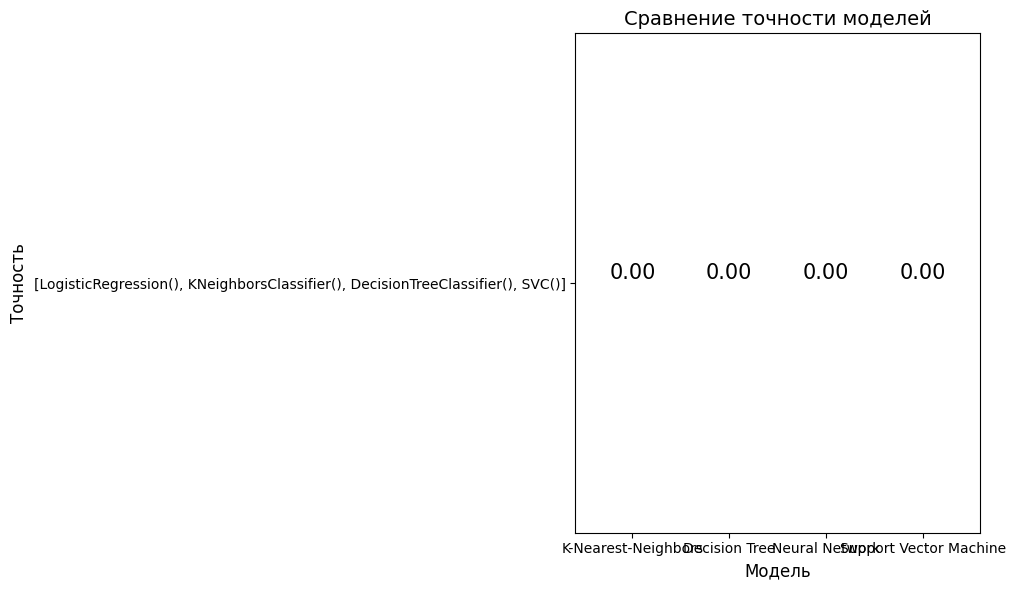

In [ ]:
x=["K-Nearest-Neighbors", "Decision Tree", "Neural Network", "Support Vector Machine"]
y=[log_model, knn_model, dec_model, svm_model]

plt.figure(figsize=(10,6))
bars = plt.bar(x, str(y), color=['lightblue', 'lightyellow', 'lightgreen', 'tomato', 'pink'])

plt.xlabel("Модель", fontsize=12)
plt.ylabel("Точность", fontsize=12)
plt.title("Сравнение точности моделей", fontsize=14)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=15)


plt.tight_layout()
plt.show()